# Exploring reflection groups features
$\def\QQ{\mathbb{Q}}$
This is a live demo that was improvised with the participants during an interactive session at the CRM workshop on reflection groups on May 29th of 2017

In [85]:
%display latex

In [1]:
1+1

2

In [166]:
W = CoxeterGroup(["E",8])

In [167]:
W

Finite Coxeter group over Integer Ring with Coxeter matrix:
[1 2 3 2 2 2 2 2]
[2 1 2 3 2 2 2 2]
[3 2 1 3 2 2 2 2]
[2 3 3 1 3 2 2 2]
[2 2 2 3 1 3 2 2]
[2 2 2 2 3 1 3 2]
[2 2 2 2 2 3 1 3]
[2 2 2 2 2 2 3 1]

In [168]:
W.cardinality()

696729600

In [169]:
w = W.an_element()

In [170]:
w.reduced_words()

[[1, 3, 2, 4, 5, 6, 7, 8], [2, 1, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8]]

In [8]:
CoxeterGroup?

In [16]:
CartanType.samples()

[['A', 1],
 ['A', 5],
 ['B', 1],
 ['B', 5],
 ['C', 1],
 ['C', 5],
 ['D', 2],
 ['D', 3],
 ['D', 5],
 ['E', 6],
 ['E', 7],
 ['E', 8],
 ['F', 4],
 ['G', 2],
 ['I', 5],
 ['H', 3],
 ['H', 4],
 ['A', 1, 1],
 ['A', 5, 1],
 ['B', 1, 1],
 ['B', 5, 1],
 ['C', 1, 1],
 ['C', 5, 1],
 ['D', 3, 1],
 ['D', 5, 1],
 ['E', 6, 1],
 ['E', 7, 1],
 ['E', 8, 1],
 ['F', 4, 1],
 ['G', 2, 1],
 ['BC', 1, 2],
 ['BC', 5, 2],
 ['B', 5, 1]^*,
 ['C', 4, 1]^*,
 ['F', 4, 1]^*,
 ['G', 2, 1]^*,
 ['BC', 1, 2]^*,
 ['BC', 5, 2]^*]

In [171]:
W = CoxeterGroup(["E",8], implementation="permutation")

In [172]:
s = W.simple_reflections()

In [173]:
s[1] * s[3] * s[2]

(1,133,3)(2,122)(4,18,22,10,9,27)(13,123,121)(15,25,23,21,19,30)(17,36,35,28,29,37)(26,41,42,33,31,47)(32,48,45,39,38,51)(34,46,40)(43,53,49)(44,61,56)(50,58,52)(54,67,59)(55,66,62)(57,69,64)(60,70,63)(65,72)(68,77,73)(71,75)(74,83,78)(76,84)(79,81)(80,87)(82,88)(85,91)(86,90)(89,96,98)(92,94)(93,100,102)(95,99)(97,101,106)(103,104,107)(105,108,110)(109,115,112,111,114,113)(124,138,142,130,129,147)(135,145,143,141,139,150)(137,156,155,148,149,157)(146,161,162,153,151,167)(152,168,165,159,158,171)(154,166,160)(163,173,169)(164,181,176)(170,178,172)(174,187,179)(175,186,182)(177,189,184)(180,190,183)(185,192)(188,197,193)(191,195)(194,203,198)(196,204)(199,201)(200,207)(202,208)(205,211)(206,210)(209,216,218)(212,214)(213,220,222)(215,219)(217,221,226)(223,224,227)(225,228,230)(229,235,232,231,234,233)

In [174]:
w = W.from_reduced_word([1,3,2])

In [175]:
w.reduced_word()

[1, 2, 3]

In [198]:
W = SymmetricGroup(3)

In [199]:
print W.category()

Join of Category of finite enumerated permutation groups and Category of finite weyl groups


In [200]:
P = W.weak_lattice()

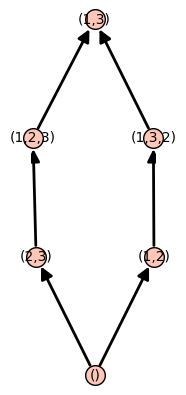

In [201]:
P.plot()

In [202]:
s = W.simple_reflections()

In [203]:
P.le( s[1], s[2]*s[1])

False

In [204]:
P.join(s[1], s[2]*s[1])

(1,3)

# Searching for features around non crossing partitions

In [207]:
search_src("NonCrossing")

In [208]:
D = DyckWords(4)

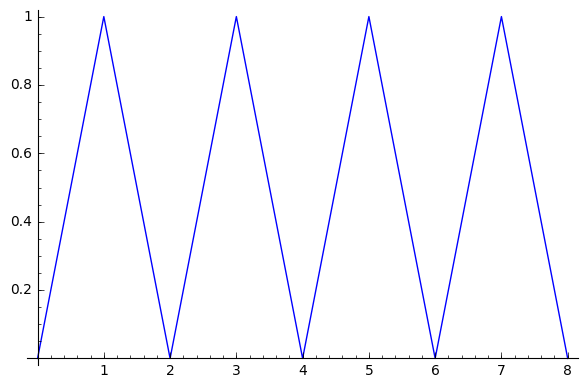

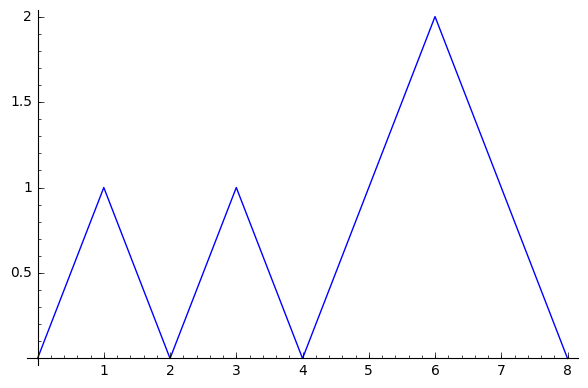

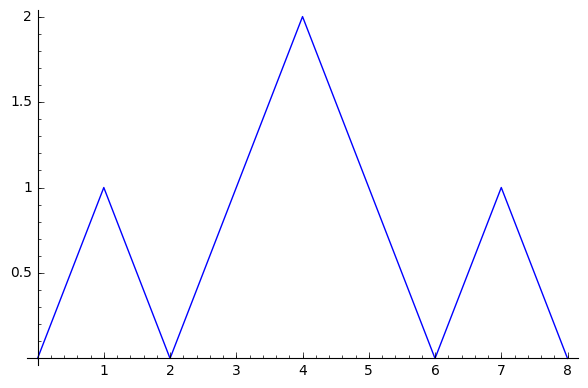

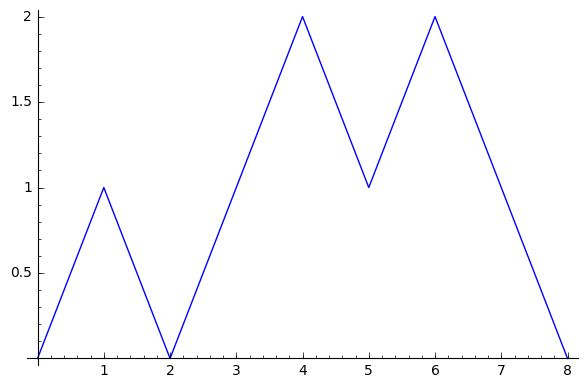

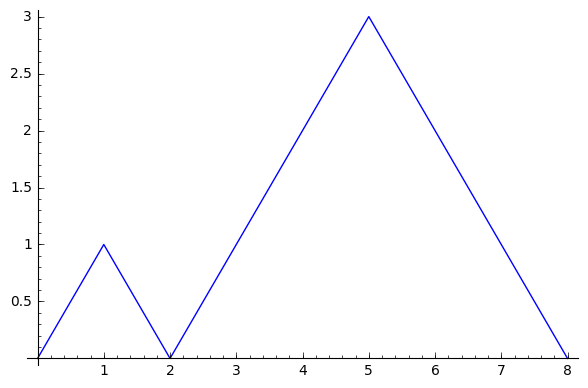

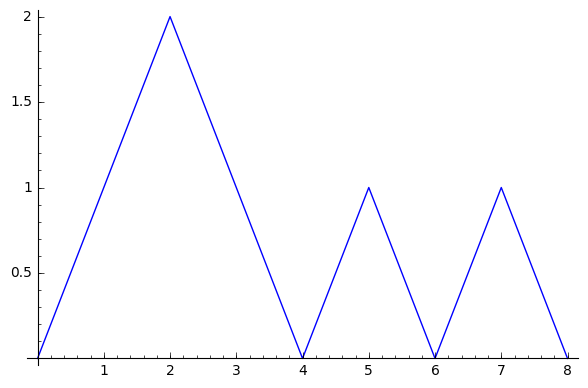

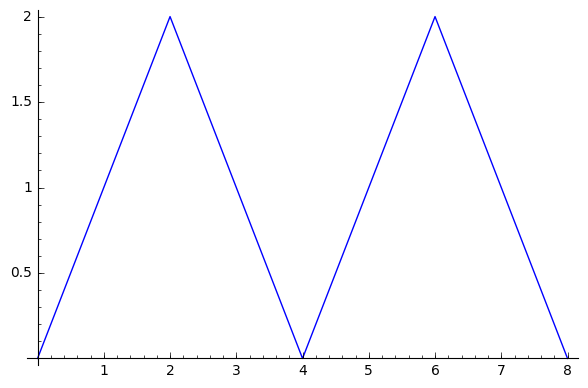

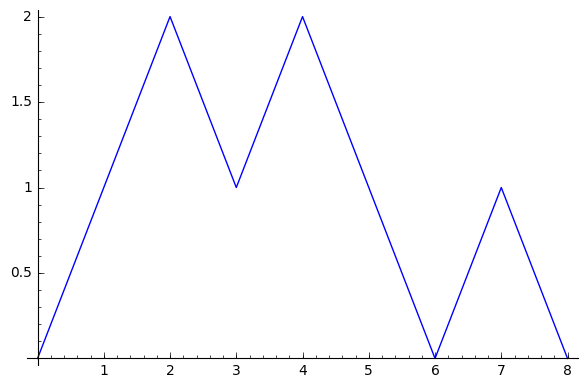

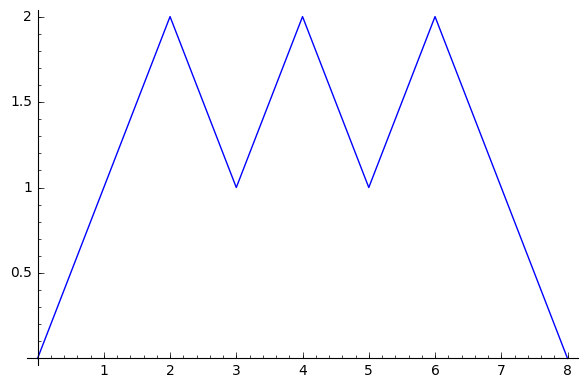

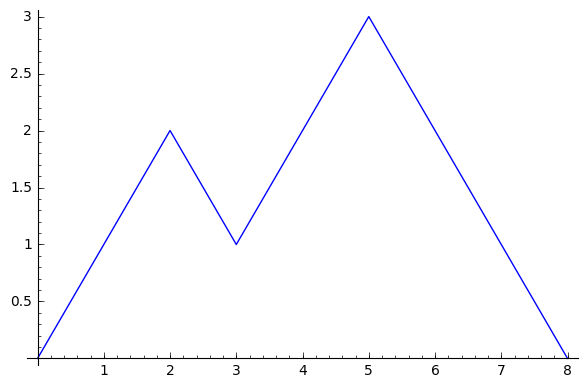

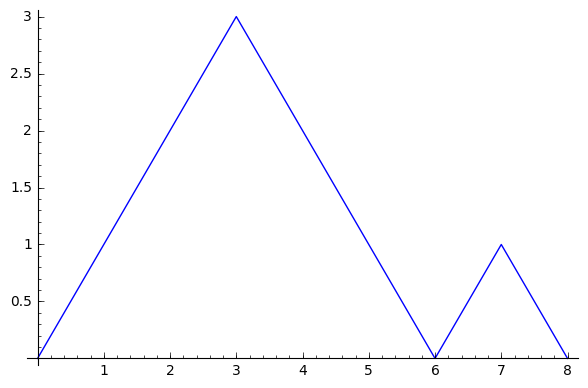

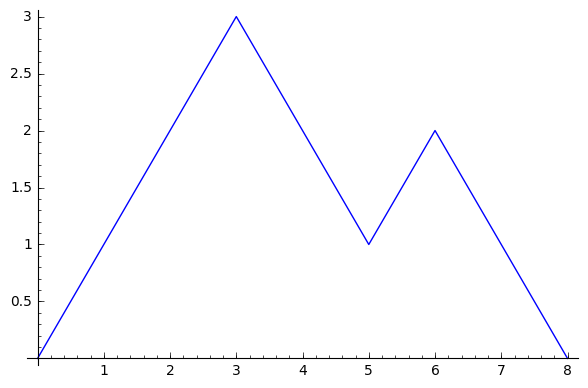

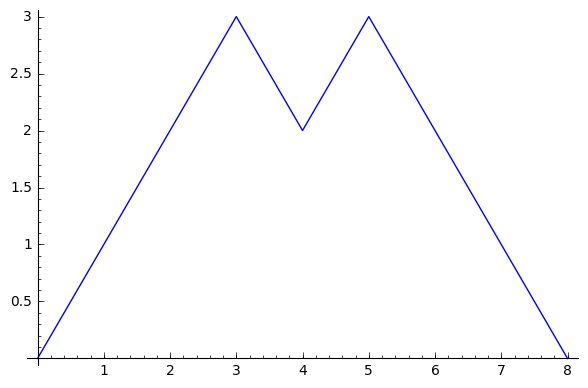

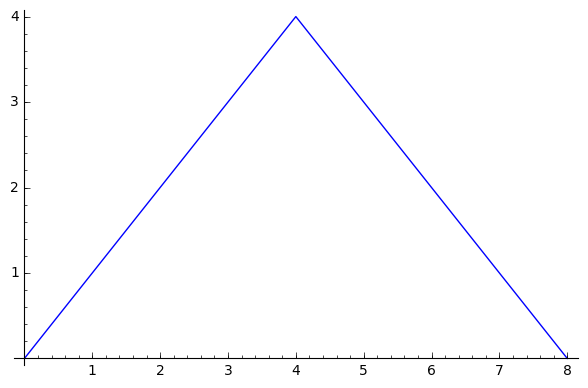

In [214]:
for d in D: show(d.plot())

In [215]:
d = D.an_element()

In [216]:
d.to_noncrossing_partition()

[[1], [2], [3], [4]]

In [222]:
W = ReflectionGroup(6)

In [225]:
search_src("absolute")

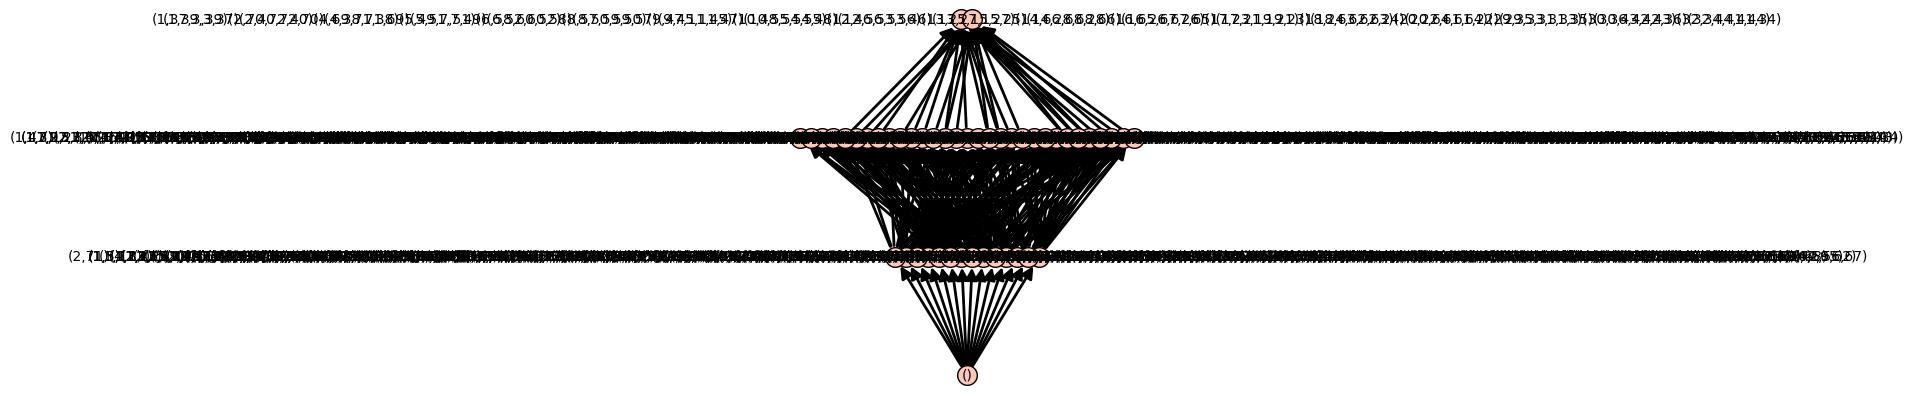

In [227]:
P = W.absolute_poset();
P.plot()

# Computing molien-type sums for reflection groups

In [229]:
W = ReflectionGroup(4); W

Irreducible complex reflection group of rank 2 and type ST4

In [230]:
W.cardinality()

24

In [231]:
W.is_isomorphic(SymmetricGroup(4))

False

In [233]:
w = W.an_element(); w

(1,3,9)(2,4,7)(5,10,18)(6,11,16)(8,12,19)(13,15,20)(14,17,21)(22,23,24)

In [235]:
m = w.to_matrix(); m

[   1    0]
[   0 E(3)]

In [244]:
1/m.characteristic_polynomial()

1/(x^2 + E(3)^2*x + E(3))

In [267]:
f = 1/W.cardinality() * \
    sum( 1/w.to_matrix().characteristic_polynomial() for w in W )
f

x^8/(x^10 - x^6 - x^4 + 1)

Frustrating as it is, it can't be factored as is:

In [268]:
f.factor()

NotImplementedError: 

That's because it looks like a fraction in $\QQ(x)$ but it is not:

In [254]:
f.parent()

Fraction Field of Univariate Polynomial Ring in x over Universal Cyclotomic Field

We construct the fraction field $\QQ(x)$ and convert f into it:

In [255]:
F = QQ['x'].fraction_field()
F(f).parent()

Now we can factor f:

In [258]:
factor(F(f))

(24) * (x - 1)^-2 * (x + 1)^-2 * x^8 * (x^2 - x + 1)^-1 * (x^2 + 1)^-1 * (x^2 + x + 1)^-1

If we want a bit more control, we can compute the characteristic polynomial manually:

In [262]:
x = F.gen()

In [264]:
1/W.cardinality() * sum(   1/det(x-w.to_matrix()) for w in W   ) 

x^8/(x^10 - x^6 - x^4 + 1)